In [411]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [412]:
data = pd.read_csv('housing.csv')
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
data = pd.read_csv('housing.csv',delim_whitespace=True, names=colnames)
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [413]:
#since ZN,CHAS are not required, we drop them from the main dataset
data= data.drop(['ZN','CHAS'],axis=1)
#normalizing the dataframe to scale to 20
dataf = ((data-data.min())/(data.max()-data.min())*20)
dataf.head()
dataf['BIAS']=1
dataf.head()

CRIM     INDUS       NOX         RM        AGE       DIS       RAD  \
0  0.000000  1.356305  6.296296  11.550105  12.832132  5.384063  0.000000   
1  0.004718  4.846041  3.456790  10.959954  15.653965  6.979240  0.869565   
2  0.004714  4.846041  3.456790  13.887718  11.987642  6.979240  0.869565   
3  0.005856  1.260997  3.004115  13.171106   8.836251  8.970892  1.739130   
4  0.014101  1.260997  3.004115  13.742096  10.566426  8.970892  1.739130   

        TAX    PTRATIO          B     LSTAT       MEDV  BIAS  
0  4.160305   5.744681  20.000000  1.793598   8.444444     1  
1  2.099237  11.063830  20.000000  4.089404   7.377778     1  
2  2.099237  11.063830  19.794745  1.269316  13.200000     1  
3  1.335878  12.978723  19.885521  0.667770  12.622222     1  
4  1.335878  12.978723  20.000000  1.986755  13.866667     1

In [414]:
features = dataf.drop(['MEDV'],axis=1)
# X is our feature vector
X = features.values
medv = dataf['MEDV'].values
# Y is our target vector
Y = np.array(medv)
Y = np.reshape(Y,(-1,1))
# W is our weights vector. Normalizing it to be zero.
W = np.zeros((12,1))

In [415]:
lr = 0.001
iters = 1000

In [416]:
def predict(X,W):
    prediction = np.dot(X,W)
    return prediction

In [417]:
def costfunction (X,W,Y):
    Y_pr = predict(X,W)
    N = len(Y)
    costs = np.sum((Y-Y_pr)**2)
    return costs/(2*N)
initial_cost = costfunction(X,W,Y)
print(initial_cost)

38.6981583955497


In [418]:
def update_weights(X,W,Y,lr):
    Y_pr = predict(X,W)
    N = len(Y)
    loss = Y - Y_pr
    gradient = np.dot(-X.T,loss)
    gradient /= N
    gradient *= lr
    W -= gradient
    return W

In [419]:
def train(X,W,Y,lr,iters):
    cost_history=[]
    for i in range(iters):
        W = update_weights(X,W,Y,lr)
        cost = costfunction(X,W,Y)
        cost_history.append(cost)
        if i%100==0:
            print("cost="+str(cost) + "  epoch="+str(i))
           
       
    return W,cost_history    

cost=11.806334305904686  epoch=0
cost=2.965996350280763  epoch=100
cost=2.7070894636956893  epoch=200
cost=2.656801831060006  epoch=300
cost=2.6383338514758607  epoch=400
cost=2.629270576004528  epoch=500
cost=2.6241913799870655  epoch=600
cost=2.621101104666685  epoch=700
cost=2.6190778259094434  epoch=800
cost=2.617649570557881  epoch=900
MSE=2.6165723978093527


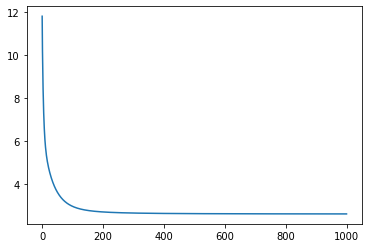

In [420]:
new_W,cost_history = train(X,W,Y,lr,iters)
MSE = cost_history[999]
print('MSE='+str(MSE))
x_plot = []
y_plot = []

for i in range(iters):
    x_plot.append([i])
    y_plot.append(cost_history[i])
   
plt.plot(x_plot,y_plot)
plt.show()
   

   

    